In [2]:
# %history -g
!pwd

/home/maxim/Projects/git2/PYSEQM_dev/Tests


In [2]:
from platform import python_version

print(python_version())

3.6.9


In [47]:
import sys
print(sys.executable)

/home/maxim/anaconda3/envs/vis_test1/bin/python


# Import

In [259]:
import matplotlib.pyplot as plt
import numpy as np
import ase.io
import ase
import nglview as nv
from ase.visualize import view
from ase_notebook import AseView, ViewConfig, get_example_atoms
from x3dase.visualize import view_x3d_n

def my_plot(files, title, subtitle, atoms_dist, labels, Range=[0,-1], size = (21,8)):
    fig, ax = plt.subplots(3, 2)

    fig.set_size_inches(size)
    fig.suptitle(title, fontsize=22)
    for i in range(0, len(files)):
        f = open(files[i])
        lines = f.readlines()
        f.close()
        r = []
        toten = []
        egap = []
        err = []
        temp = []
        for j in range(0, len(lines)):
            if 'step' in lines[j]:
                a = np.array([float(x) for x in lines[j+1+atoms_dist[0]].split()[1:4] ])
                b = np.array([float(x) for x in lines[j+1+atoms_dist[1]].split()[1:4] ])
                r.append(np.linalg.norm(a-b))
                temp.append(float( lines[j].split()[3][0:-1]))
                toten.append(float(lines[j].split()[5]) + float( lines[j].split()[7]))
                egap.append(float( lines[j].split()[9]))
                err.append(float( lines[j].split()[11]))

        fontsize = 18
        ax[0,0].set_title(subtitle + ' dist, Å', fontsize=fontsize)
        ax[0,0].plot(r[Range[0]:Range[1]], linewidth=4-i, label = labels[i])
        ax[0,0].legend(fontsize = 15, loc=(0.7,1.1))

        ax[0,1].set_title(subtitle + ' total energy, eV', fontsize=fontsize)
        ax[0,1].plot(toten[Range[0]:Range[1]], linewidth=5-i)

        ax[1,0].set_title(subtitle + ' HOMO-LUMO gap, eV', fontsize=fontsize)
        ax[1,0].plot(egap[Range[0]:Range[1]], linewidth=4-i)

        ax[1,1].set_title('Residual', fontsize=fontsize)
        ax[1,1].plot(err[Range[0]:Range[1]],)
        
        ax[2,1].set_title('T, K', fontsize=fontsize)
        ax[2,1].plot(temp[Range[0]:Range[1]],)
        [x.tick_params(axis='x', labelsize=13) for y in ax for x in y]
        [x.tick_params(axis='y', labelsize=13) for y in ax for x in y]

        print(len(toten))
    fig.tight_layout()

def my_plot_di(files, title, subtitle, atoms_ang, labels, Range=[0,-1], size = (21,8)):
    fig, ax = plt.subplots(3, 2)
    fig.set_size_inches(size)
    fig.suptitle(title, fontsize=22)
    for i in range(0, len(files)):
        traj = ase.io.read(files[i], index=':')
        d = []
        for j in range(0, len(traj)):
            d.append(traj[j].get_dihedral(atoms_ang[0],atoms_ang[1],atoms_ang[2],atoms_ang[3]))

        d = np.unwrap(d, discont=180 )
        #d_ = np.unwrap(d, discont=359 )

        f = open(files[i])
        lines = f.readlines()
        f.close()
        toten = []
        egap = []
        err = []
        temp = []
        for j in range(0, len(lines)):
            if 'step' in lines[j]:
                temp.append(float( lines[j].split()[3][0:-1]))
                toten.append(float(lines[j].split()[5]) + float( lines[j].split()[7]))
                egap.append(float( lines[j].split()[9]))
                err.append(float( lines[j].split()[11]))

        fontsize = 18
        ax[0,0].set_title(subtitle + ' dihedral angle, °', fontsize=fontsize)
        ax[0,0].plot(d[Range[0]:Range[1]], linewidth=4-i, label = labels[i])
        #ax[0,0].plot(d_, linewidth=3-i, label = labels[i])

        ax[0,0].legend(fontsize = 15)

        ax[0,1].set_title(subtitle + ' total energy, eV', fontsize=fontsize)
        ax[0,1].plot(toten[Range[0]:Range[1]], linewidth=3-i)

        ax[1,0].set_title(subtitle + ' HOMO-LUMO gap, eV', fontsize=fontsize)
        ax[1,0].plot(egap[Range[0]:Range[1]], linewidth=3-i)

        ax[1,1].set_title('Residual', fontsize=fontsize)
        ax[1,1].plot(err[Range[0]:Range[1]],)
        
        ax[2,1].set_title('T, K', fontsize=fontsize)
        ax[2,1].plot(temp[Range[0]:Range[1]],)
        [x.tick_params(axis='x', labelsize=14) for y in ax for x in y]
        [x.tick_params(axis='y', labelsize=14) for y in ax for x in y]
        print(len(toten))
    fig.tight_layout()
print(111)

111


In [69]:
files = [
        'C36_aimd.0.xyz',
        'C36_xl.0.xyz',
        'C36_xl-lr.0.xyz'
        ]
labels = [
        'BOMD',
        'XL-BOMD',
        'DM based XL-BOMD'
        ]
#my_plot_di(files, 'C36, dt=0.4fs, T=400K, Te=1500K', 'C36', (48,51,43,40), labels)

# C36

3000
3000


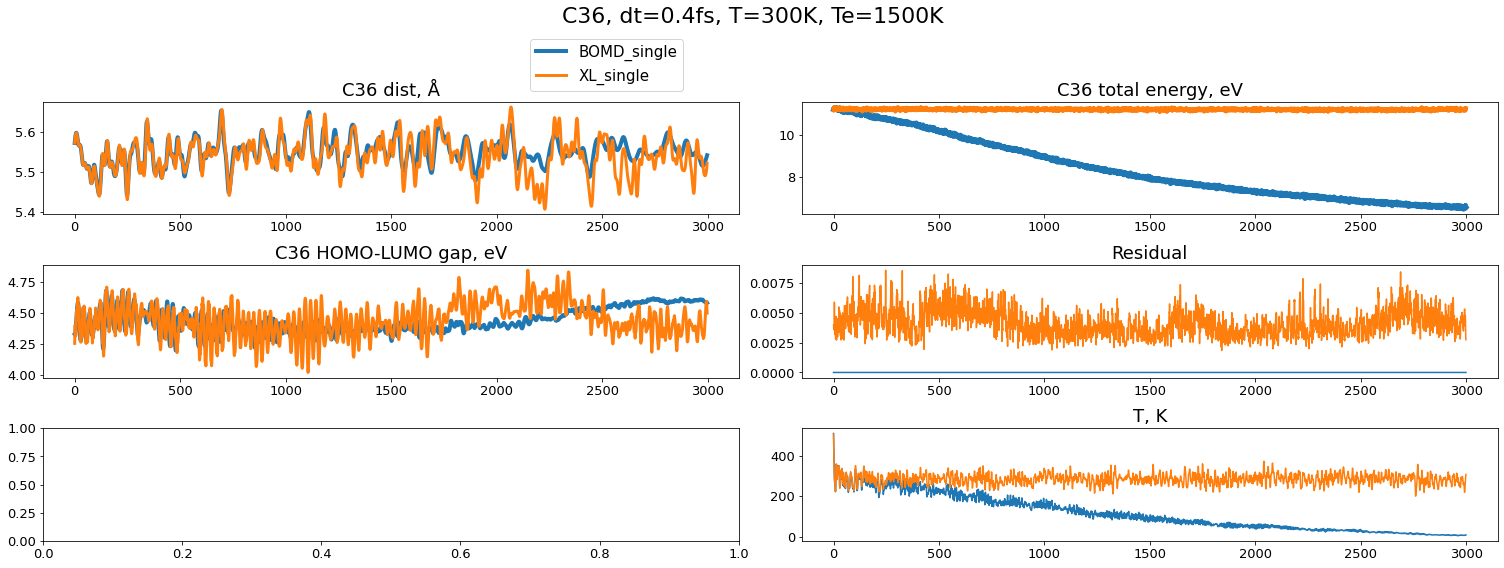

In [214]:
files = [
        'BOMD_sing.0.xyz',
        'XL_sing.0.xyz',
        ]
labels = [
        'BOMD_single',
        'XL_single',
        ]
my_plot(files, 'C36, dt=0.4fs, T=300K, Te=1500K', 'C36', (0,1), labels, [0,-1])

3000
2784


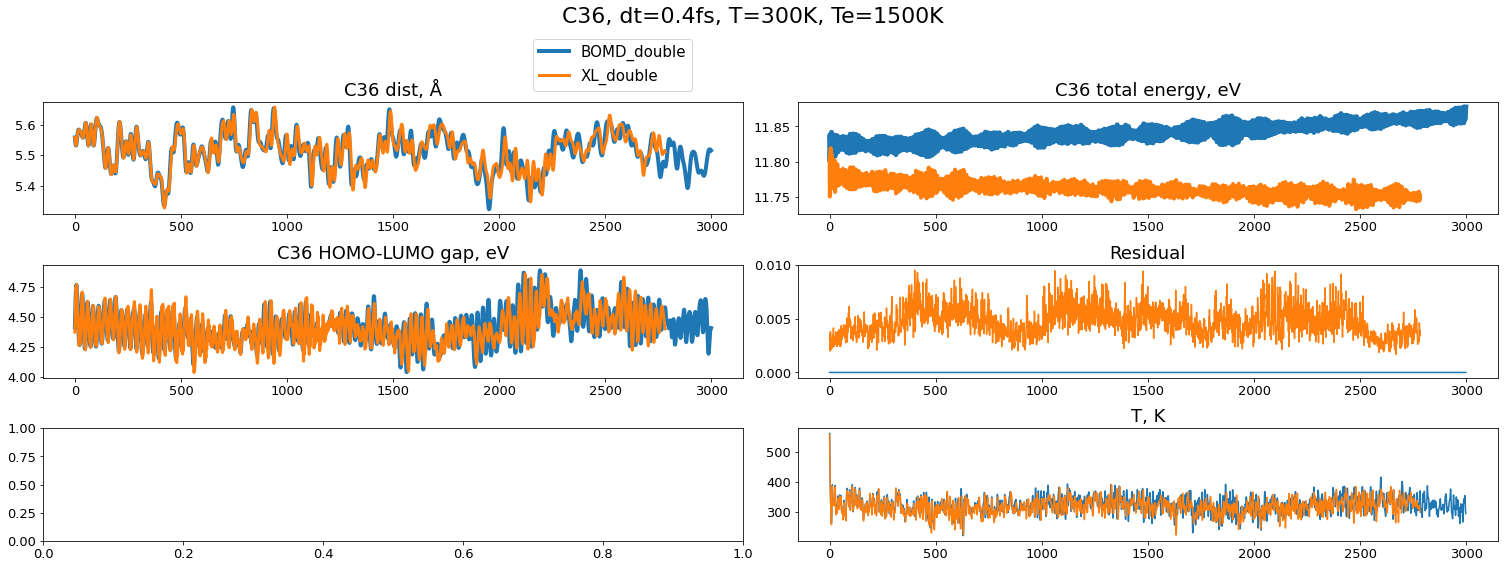

In [223]:
files = [
        'BOMD_doub.0.xyz',
        'XL_doub.0.xyz',

        ]
labels = [
        'BOMD_double',
        'XL_double'
        ]
my_plot(files, 'C36, dt=0.4fs, T=300K, Te=1500K', 'C36', (0,1), labels, [0,-1])

3000
3000


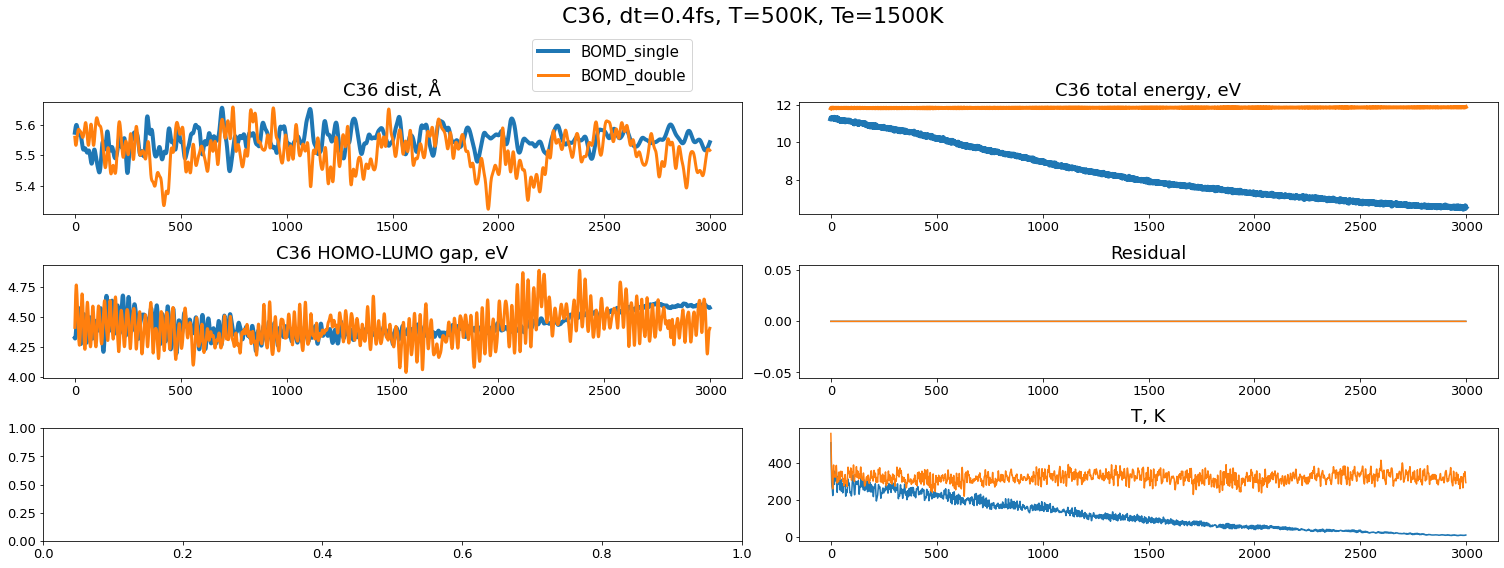

In [205]:
files = [
        'BOMD_sing.0.xyz',
        'BOMD_doub.0.xyz',
        ]
labels = [
        'BOMD_single',
        'BOMD_double',
        ]
my_plot(files, 'C36, dt=0.4fs, T=500K, Te=1500K', 'C36', (0,1), labels, [0,-1])

3000
2096


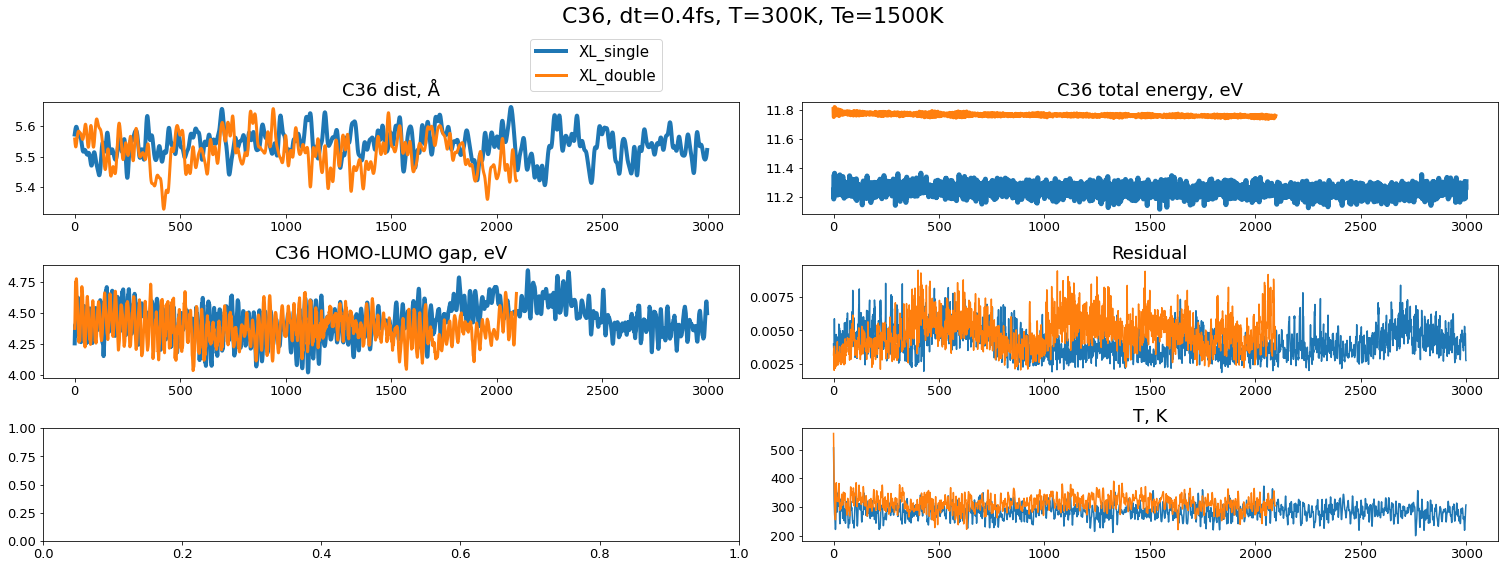

In [217]:
files = [
        'XL_sing.0.xyz',
        'XL_doub.0.xyz',

        ]
labels = [
        'XL_single',
        'XL_double',
        ]
my_plot(files, 'C36, dt=0.4fs, T=300K, Te=1500K', 'C36', (0,1), labels, [0,-1])

3000
3000


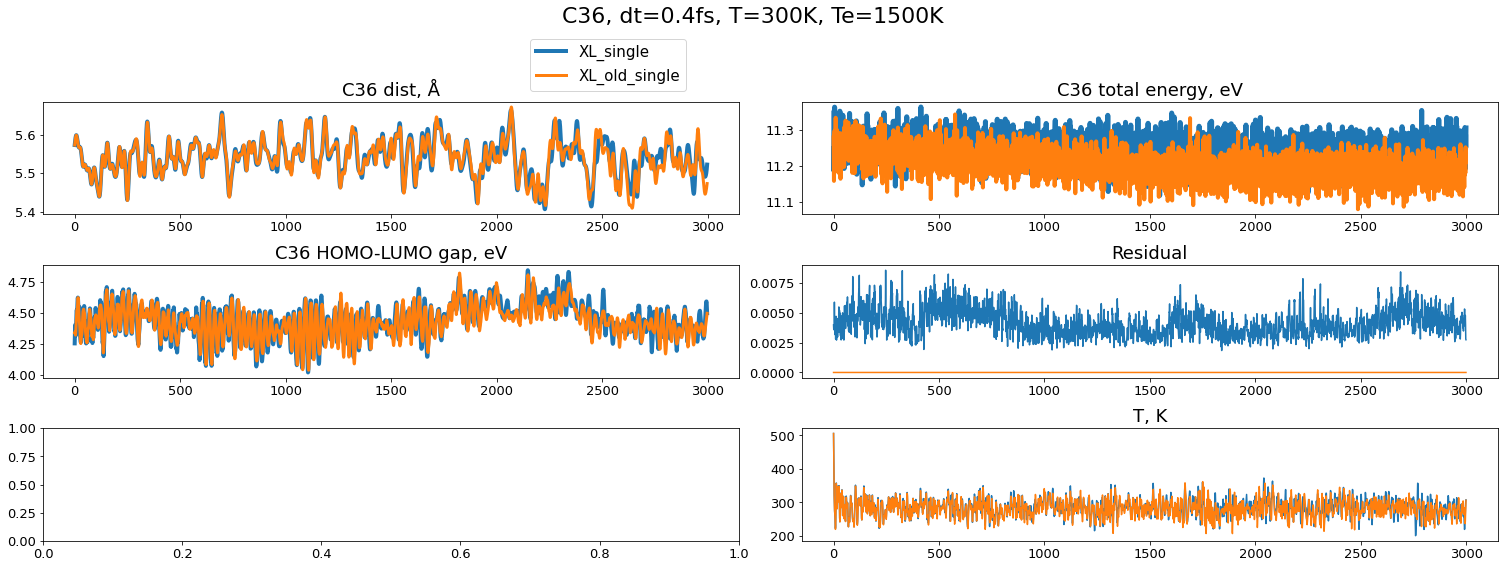

In [233]:
files = [
        'XL_sing.0.xyz',
        'XL_old_sing.0.xyz',

        ]
labels = [
        'XL_single',
        'XL_old_single',
        ]
my_plot(files, 'C36, dt=0.4fs, T=300K, Te=1500K', 'C36', (0,1), labels, [0,-1])

5000
3466


FileNotFoundError: [Errno 2] No such file or directory: 'XL_old_doub.0.xyz'

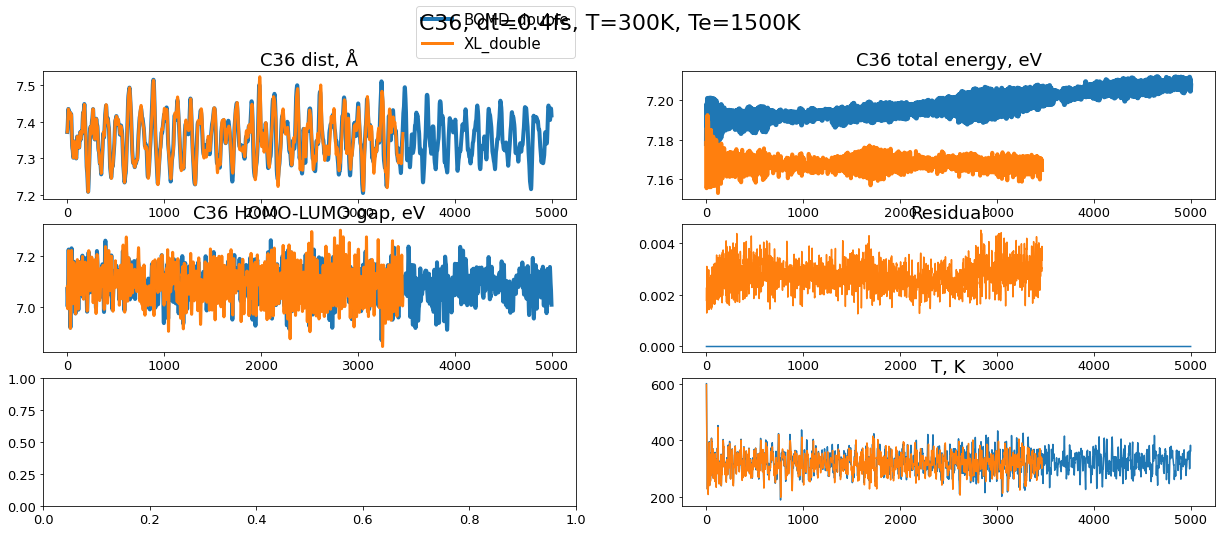

In [270]:
files = [
        'BOMD_doub.0.xyz',
        'XL_doub.0.xyz',
        'XL_old_doub.0.xyz',
        ]
labels = [
        'BOMD_double',
        'XL_double',
        'XL_old_double',
        ]
my_plot(files, 'C36, dt=0.4fs, T=300K, Te=1500K', 'C36', (0,1), labels, [0,-1])